In [211]:
import numpy as np
import matplotlib.pyplot as plt
import random

Perceptron Exploration

In [230]:
x1 = [1,1,0,0,1,0,0,-1]
x2 = [-1,0,0,-1,1,1,0,0]
x3 = [-1,1,-1,1,1,0,1,1]
y  = [0,0,0,0,1,1,1,1]#P(y=0)=0.5, P(y=1)=0.5
p_y = [1/2,1/2]
p_x1 = [1/8,4/8,3/8]
p_x2 = [2/8,4/8,2/8]
p_x3 = [2/8,1/8,5/8]

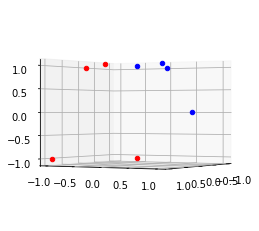

In [231]:
ax = plt.axes(projection ="3d")
for i in range(len(x1)):
    if y[i]==0:
        ax.scatter(x1[i],x2[i],x3[i], color = 'red')
    else:
        ax.scatter(x1[i],x2[i],x3[i], color = 'blue')
ax.view_init(0,30)
plt.show()

In [232]:
alpha = 1
tiebreaker = 0
w = [0,0,0,0]
w0_time = []
w1_time = []
w2_time = []
w3_time = []
classified = False
while not classified:
    poss_class = True
    for i in range(len(x1)):
        pred_val = w[0] + x1[i]*w[1] + x2[i]*w[2] + x3[i]*w[3]
        if pred_val > 0:
            pred = 1
        elif pred_val < 0:
            pred = 0
        else:
            pred = tiebreaker
        if pred != y[i]:
            poss_class = False
            w[0] += alpha*(y[i]-pred)
            w[1] += alpha*(y[i]-pred)*x1[i]
            w[2] += alpha*(y[i]-pred)*x2[i]
            w[3] += alpha*(y[i]-pred)*x3[i]
        w0_time.append(w[0])
        w1_time.append(w[1])
        w2_time.append(w[2])
        w3_time.append(w[3])
    classified = poss_class


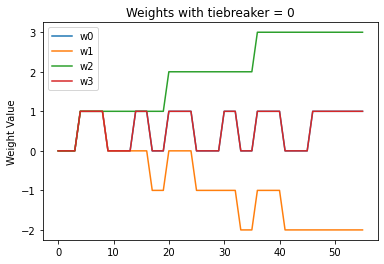

In [233]:
t = list(range(len(w0_time)))
plt.plot(t, w0_time, label = "w0")
plt.plot(t, w1_time, label = "w1")
plt.plot(t, w2_time, label = "w2")
plt.plot(t, w3_time, label = "w3")
plt.title("Weights with tiebreaker = 0")
plt.ylabel("Weight Value")
plt.legend()
plt.show()

In [234]:
hw = []
for i in range(len(x1)):
    d = -w[0] - w[1]*x1[i] - w[2]*x2[i] - w[3]*x3[i]
    hw.append(1/(1+np.exp(d)))

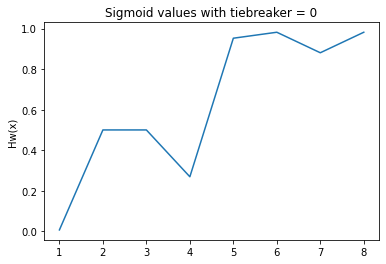

In [235]:
t = list(range(1,len(hw)+1))
plt.plot(t, hw)
plt.title("Sigmoid values with tiebreaker = 0")
plt.ylabel("Sample")
plt.ylabel("Hw(x)")
plt.show()

Problem 4

In [236]:
def sig(x):
    return 1/(1+np.exp(-x))

In [237]:
def deriv_sig(x):
    return sig(x)*(1-sig(x))

In [238]:
def activ(x, deriv=False):
    if activ_funct == "sigmoid":
        if deriv:
            return sig(x)*(1-sig(x))
        else:
            return 1/(1+np.exp(-x))
    elif  activ_funct == "tanh":
        if deriv:
            return 1-(2*sig(2*x)-1)*(2*sig(2*x)-1)
        else:
            return 2*sig(2*x)-1
    elif  activ_funct == "softplus":
        if deriv:
            return 1/(1+np.exp(-x))
        else:
            return np.log(1+np.exp(x))
    elif  activ_funct == "relu":
        if deriv:
            if x < 0:
                return 0
            else:
                return 1
        else:
            return max(0,1)

In [239]:
w11_1 = random.random()#Ed post 1694
w12_1 = random.random()
w21_1 = random.random()
w22_1 = random.random()
w31_1 = random.random()
w32_1 = random.random()
w01_1 = random.random()
w02_1 = random.random()
w11_2 = random.random()
w21_2 = random.random()
w01_2 = random.random()
alpha = 0.5
activ_funct = "sigmoid"
loss_time = []
num_iter = 0
loss = 1000
while num_iter < 1000 and loss > 0.001:
    for i in range(len(x1)):
        a1 = activ(w01_1+w11_1*x1[i]+w21_1*x2[i]+w31_1*x3[i])
        a2 = activ(w02_1+w12_1*x1[i]+w22_1*x2[i]+w32_1*x3[i])
        y_hat = activ(w01_2+w11_2*a1+w21_2*a2)

        g1_d = activ(w01_1+w11_1*x1[i]+w21_1*x2[i]+w31_1*x3[i],True)
        g2_d = activ(w02_1+w12_1*x1[i]+w22_1*x2[i]+w32_1*x3[i],True)
        g3_d = activ(w01_2+w11_2*a1+w21_2*a2,True)

        loss = 0.5*(y[i]-y_hat)*(y[i]-y_hat)
        #print(loss)
        loss_time.append(loss)

        d_y = -1*(y[i]-y_hat)
        d_w01_2 = d_y*g3_d
        d_w11_2 = d_w01_2*a1
        d_w21_2 = d_w01_2*a2
        d_w01_1 = d_w01_2*w11_2*g1_d
        d_w02_1 = d_w01_2*w21_2*g2_d
        d_w11_1 = d_w01_2*w11_2*g1_d*x1[i]
        d_w12_1 = d_w01_2*w21_2*g2_d*x1[i]
        d_w21_1 = d_w01_2*w11_2*g1_d*x2[i]
        d_w22_1 = d_w01_2*w21_2*g2_d*x2[i]
        d_w31_1 = d_w01_2*w11_2*g1_d*x3[i]
        d_w32_1 = d_w01_2*w21_2*g2_d*x3[i]

        w11_1 -= alpha*d_w11_1
        w12_1 -= alpha*d_w12_1
        w21_1 -= alpha*d_w21_1
        w22_1 -= alpha*d_w22_1
        w31_1 -= alpha*d_w31_1
        w32_1 -= alpha*d_w32_1
        w01_1 -= alpha*d_w01_1
        w02_1 -= alpha*d_w02_1
        w11_2 -= alpha*d_w11_2
        w21_2 -= alpha*d_w21_2
        w01_2 -= alpha*d_w01_2
    num_iter+=1


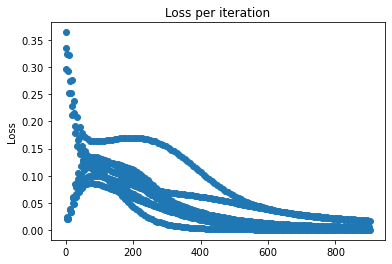

In [240]:
time = list(range(len(loss_time)))
plt.scatter(time,loss_time)
plt.title("Loss per iteration")
plt.ylabel("Loss")
plt.show()